In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.rcParams.update({'font.size': 15})
plt.rcParams.update({"figure.figsize": (20,3)})
plt.rcParams.update({'figure.autolayout': True})

## 2019/20 Dataset

In this notebook I explore other files available in the data outside of `listings.csv` and `listings-summary.csv`. The most useful of these is `calendar.csv`. Some of this was contained within `listings-summary.csv`: the number of days in the year that a listing is booked out is given in the `availability_365` column in `listings-summary.csv`. First I have a look at the **2019/20 data**. All Airbnb listings are present in the dataframe for either 365 or 366 days. 

In [14]:
calendar19 = pd.read_csv('../data19/calendar.csv')
calendar19.shape

(4834568, 7)

In [15]:
calendar19.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,568026,2019-06-25,f,$64.00,$64.00,3.0,60.0
1,327159,2019-06-25,t,$113.00,$113.00,1.0,1.0
2,327159,2019-06-26,t,$113.00,$113.00,1.0,56.0
3,327159,2019-06-27,t,$113.00,$113.00,1.0,56.0
4,327159,2019-06-28,t,$113.00,$113.00,1.0,56.0


In [16]:
from pandas.api.types import is_numeric_dtype

def format_price(dataframe, column):
    if not is_numeric_dtype(dataframe[column]):
        dataframe[column] = dataframe[column].str.replace('$', '')
        dataframe[column] = dataframe[column].str.replace(',', '')
        dataframe[column] = pd.to_numeric(dataframe[column])
        
format_price(calendar19, "price")
calendar19.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,568026,2019-06-25,f,64.0,$64.00,3.0,60.0
1,327159,2019-06-25,t,113.0,$113.00,1.0,1.0
2,327159,2019-06-26,t,113.0,$113.00,1.0,56.0
3,327159,2019-06-27,t,113.0,$113.00,1.0,56.0
4,327159,2019-06-28,t,113.0,$113.00,1.0,56.0


In [17]:
calendar19["date"] = pd.to_datetime(calendar19["date"])
calendar19["booked"] = calendar19['available'].apply(lambda x: 1 if x == 'f' else 0)
calendar19.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
booked                     int64
dtype: object

The price of an Airbnb varies throughout the year for a single listing. 

In [18]:
prices19 = pd.DataFrame(calendar19, columns=["listing_id", "price", "date"])
prices19.groupby(by = "listing_id").max() - prices19.groupby(by = "listing_id").min()

,price,date
listing_id,,
15420,115.0,364 days
24288,52.0,364 days
38628,17.0,364 days
44552,22.0,364 days
47616,60.0,364 days
...,...,...
36061175,6.0,364 days
36061191,0.0,364 days
36061722,0.0,364 days


I take the mean Airbnb price for each day of the year. There are clear spikes in pricing during August, when the Edinburgh Fringe takes place, and at the end of December/beginning of January when the Christmas markets and Hogmany street party take place. There also appears to be a weekly pattern going on, where Airbnbs are more expensive on Friday and Saturday nights than they are any other night. 

Price always seems to be tracking slightly upwards, which may be a result of inflation, although I lack the domain financial knowledge to assert this.

<Figure size 1440x216 with 0 Axes>

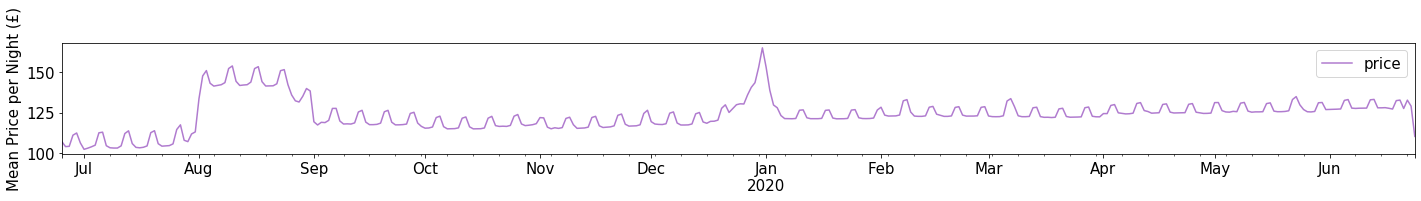

In [111]:
average_prices19 = prices19.drop("listing_id", axis = 1).groupby(by = "date").mean()

plt.figure()
plt.gcf().subplots_adjust(bottom=0.15)
fig = average_prices19.plot(color = "#B07BCF", label = "2019-20")
fig.set_ylabel("Mean Price per Night (£)")
fig.set_xlabel('')
plt.savefig('monthly_seasonality.png')
plt.show()

<Figure size 1440x216 with 0 Axes>

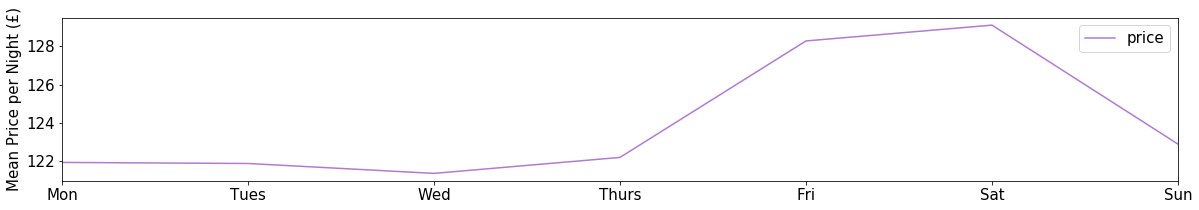

In [32]:
by_weekday19 = average_prices19.groupby(average_prices19.index.dayofweek).mean()
by_weekday19.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

plt.figure()
fig = by_weekday19.plot(color = "#B07BCF")
fig.set_ylabel("Mean Price per Night (£)")
plt.savefig('weekly_seasonality.png')
plt.show()

Unlike the pricing data, it is less easy to explain the trends that are observed in the booking data. This could be in part because there is no differentiation between an Airbnb being booked and it being unavailable. Bookings somewhat increase during the Fringe and the Christmas events, but I cannot easily explain why winter stays are booked more frequently after January than they are before January, or the jump in booked Airbnbs that occurs in April.  

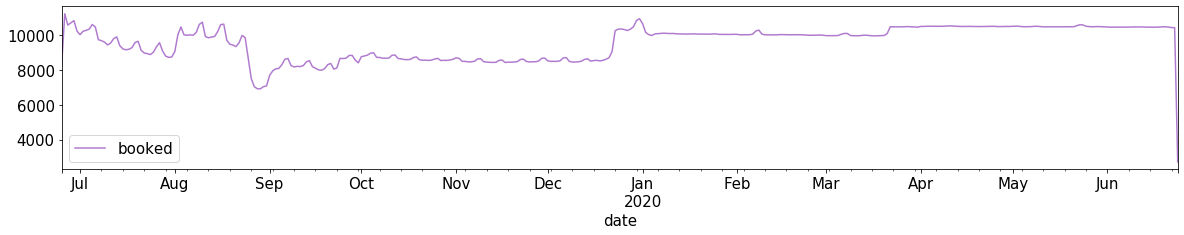

In [33]:
avail19 = pd.DataFrame(calendar19, columns=["listing_id", "booked", "date"])
avail_all19 = avail19.drop("listing_id", axis = 1).groupby(by = "date").sum()
avail_all19.plot(color = "#B07BCF")

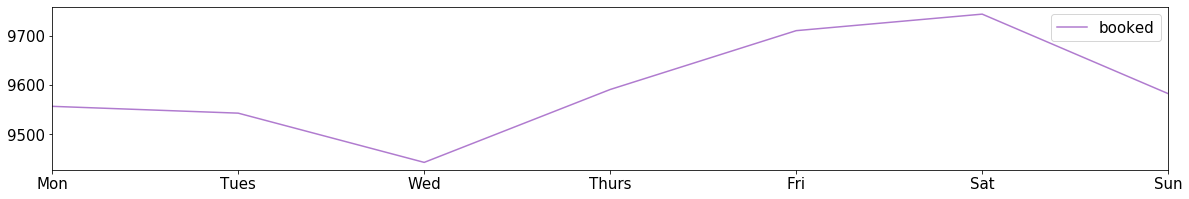

In [34]:
by_weekday19 = avail_all19.groupby(average_prices19.index.dayofweek).mean()
by_weekday19.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday19.plot(color = "#B07BCF")

In [92]:
average_prices19.tail()

,price
date,
2020-06-20,132.840242
2020-06-21,127.641148
2020-06-22,132.797584
2020-06-23,129.094451
2020-06-24,110.408866


## 2020/21 Dataset

Now let's have a look at the **2020/21** data. Despite the COVID-19 pandemic resulting in the cancellation of the Fringe prior to the collection of this data ([1st April](https://www.edfringe.com/covid-19)), there is still a spike in Airbnb prices during August. However, there is no evidence of a spike in the number of bookings made for August like that which we observed for 2019/20.

In [35]:
calendar20 = pd.read_csv('../data20/calendar.csv')

format_price(calendar20, "price")

calendar20["date"] = pd.to_datetime(calendar20["date"])
calendar20["booked"] = calendar20['available'].apply(lambda x: 1 if x == 'f' else 0)
calendar20.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
booked                     int64
dtype: object

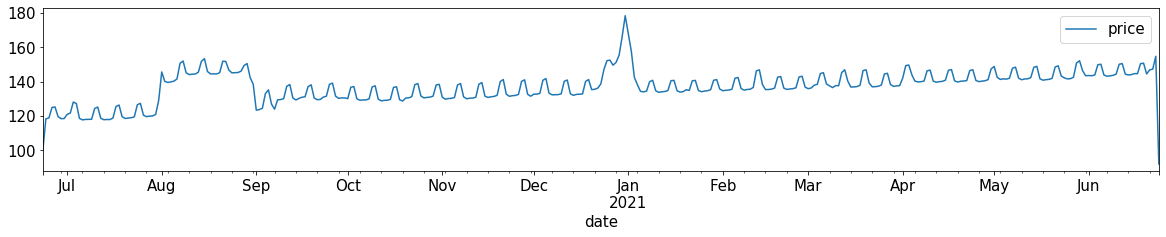

In [36]:
prices20 = pd.DataFrame(calendar20, columns=["listing_id", "price", "date"])
average_prices20 = prices20.drop("listing_id", axis = 1).groupby(by = "date").mean()
average_prices20.plot()

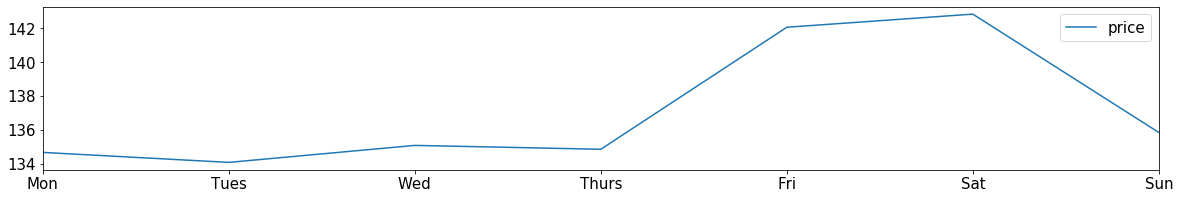

In [37]:
by_weekday20 = average_prices20.groupby(average_prices20.index.dayofweek).mean()
by_weekday20.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday20.plot()

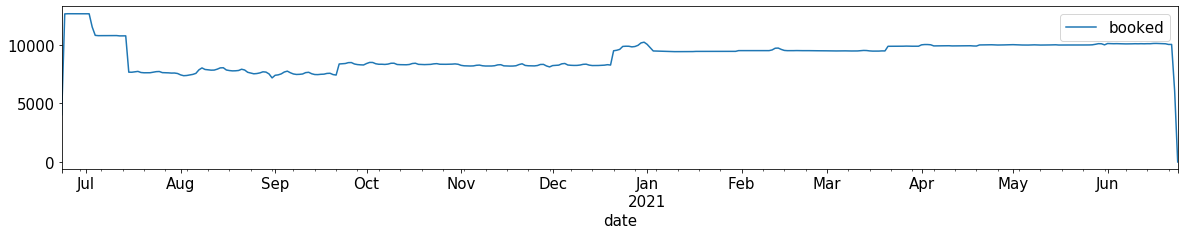

In [38]:
avail20 = pd.DataFrame(calendar20, columns=["listing_id", "booked", "date"])
avail_all20 = avail20.drop("listing_id", axis = 1).groupby(by = "date").sum()
avail_all20.plot()

Below I group Airbnbs from both 2019/20 and 2020/21 and plot the combined trends from both years.

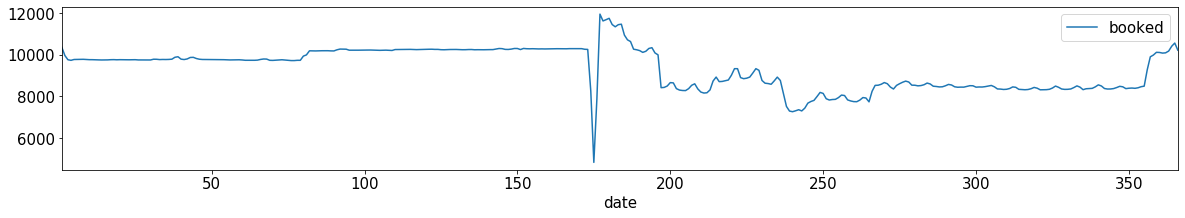

In [39]:
avail_all = avail_all19.append(avail_all20)
by_year = avail_all.groupby(avail_all.index.dayofyear).mean()
by_year.plot()

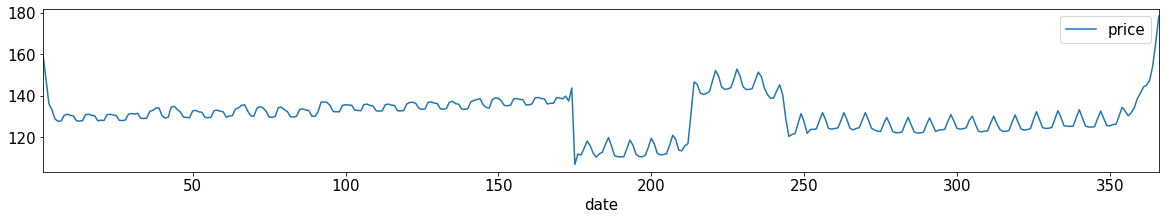

In [40]:
average_prices = average_prices19.append(average_prices20)
by_year = average_prices.groupby(average_prices.index.dayofyear).mean()
by_year.plot()

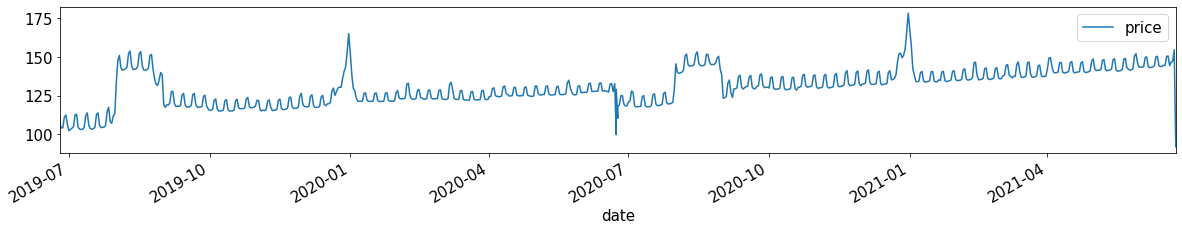

In [43]:
dfs = [average_prices19, average_prices20]

average_prices = pd.concat(dfs)
average_prices.plot()
#plt.figure()
#plt.plot(average_prices19.index, average_prices19.price, color = "#B07BCF", label = "2019-20")
#plt.plot(average_prices20.index, average_prices20.price, label = "2020-21")
#fig.set_ylabel("Mean Price per Night (£)")
#fig.set_xlabel('')
#average_prices20.plot(label = "2020-21")
#plt.savefig('monthly_seasonality.png')
#plt.legend()
#plt.show()

In [56]:
weekly_prices19 = prices19.drop("listing_id", axis = 1).groupby(by = prices19.date).mean()
weekly_prices20 = prices20.drop("listing_id", axis = 1).groupby(by = prices20.date).mean()

In [101]:
average_prices20 = average_prices20[2:]

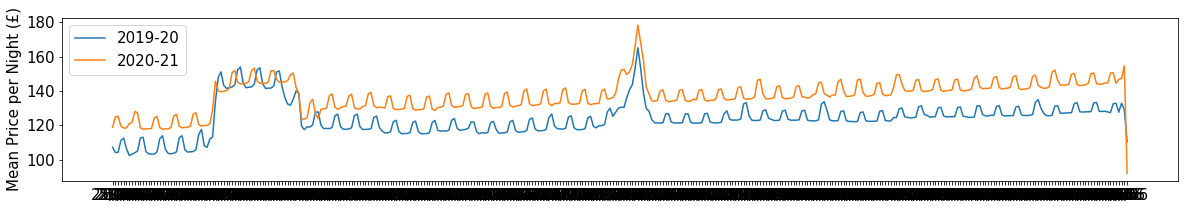

In [102]:
fig, ax = plt.subplots()
plt.plot(average_prices19.index.strftime("%d/%m"), average_prices19.price, label = "2019-20")
plt.plot(average_prices20.index.strftime("%d/%m"), average_prices20.price, label = "2020-21")
ax.set_ylabel("Mean Price per Night (£)")
plt.legend()
plt.show()

## Other Data 

Here I take a brief look at the other data available. `reviews.csv` doesn't have any numerical ratings, only text. `neighbourhoods.csv` does not give any additional useful data - it is just a list of neighbourhood names. 

In [16]:
reviews_summary = pd.read_csv('../data19/reviews-summary.csv')
reviews_summary.head()

,listing_id,date
0,15420,2011-01-18
1,15420,2011-01-31
2,15420,2011-04-19
3,15420,2011-04-23
4,15420,2011-05-15


In [17]:
reviews = pd.read_csv('../data19/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


In [18]:
areas = pd.read_csv('../data19/neighbourhoods.csv')
areas.head()

,neighbourhood_group,neighbourhood
0,NaN,Abbeyhill
1,NaN,Baberton and Juniper Green
2,NaN,Balerno and Bonnington Village
3,NaN,Balgreen and Roseburn
4,NaN,"Barnton, Cammo and Cramond South"
